# Homework Set 6

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 7, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

WENBO SUN 13087347 \
SHUAI WANG 13128051

Run the following cell to import the necessary packages.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate
import scipy

# Exercise 1



Runge's function is given by

$$ f(t) = 1/(1+25t^2).$$

# (a)
Interpolate Runge's function on $[-1,1]$ by a polynomial $p_k$ of degree $k$ for $k = 5,10,15$. Use equally spaced interpolation points. Draw your interpolating polynomials together with $f$.

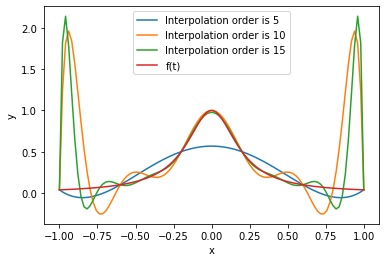

In [2]:
#YOUR ANSWER HERE
from scipy.interpolate import lagrange

def f(x):
    y = 1/(1+25*pow(x,2)) 
    return y
    
for i in [6,11,16]:
    x = np.linspace(-1,1,i)
    poly = lagrange(x, f(x))
    
    x_new = np.linspace(-1,1,100)
    plt.plot(x_new, poly(x_new),label="Interpolation order is {}".format(i-1))
    
plt.plot(x_new,1/(1+25*x_new**2),label="f(t)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# (b)
Repeat (a) to find polynomials $q_k$. This time use the Chebyshev points as interpolation points. They are given by

$$t_i = \cos \left( \frac{(2i-1)\pi}{2k+2} \right),\, \,i = 1,\ldots,k+1.$$

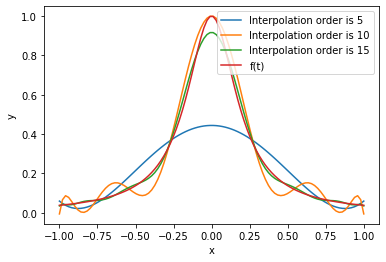

In [3]:
#YOUR ANSWER HERE
def Chebyshev(N):
    x=[]
    for i in range(1,N+1):
        x.append(np.cos((2*i-1)*np.pi/(2*N)))
    return x

for i in [5+1,10+1,15+1]:
    x = Chebyshev(i)
   
    y = 1/(1+25*np.power(x,2))
    poly = lagrange(x, y)

    x_new = np.linspace(-1,1,100)
    plt.plot(x_new,poly(x_new),label="Interpolation order is {}".format(i-1))

plt.plot(x_new,1/(1+25*x_new**2),label="f(t)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# (c)
Verify numerically that the maximum of the difference of $f$ and $q_k$ in the interval $[-1,1]$ decreases with increasing $k$ by trying various values of $k$.

range(5, 30)


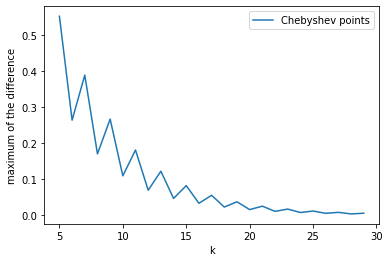

In [4]:
#YOUR ANSWER HERE
import matplotlib.ticker as ticker
from numpy import linalg

times=0

def find_diff(X, Y):
    diff = 0
    for i in range(len(X)):
        a = np.abs(X[i] - Y[i])
        if (a > diff):
            diff = a
    return diff

order = range(5,30)
error1=np.zeros(len(order))
error2=np.zeros(len(order))


for i in order:
    #Chebyshev point
    x1 = Chebyshev(i+1)
    y1 = 1/(1 + 25 * np.power(x1,2))
    poly1 = lagrange(x1, y1)
    
    #equal spaced point
    x2 = np.linspace(-1,1,i+1)
    y2 = 1/(1 + 25 * np.power(x2,2))
    poly2 = lagrange(x2, y2)
    
    #test points
    x_new = np.linspace(-1, 1, 100)
    y_new = 1/(1+25 * np.power(x_new,2))
    
    #Calaulate error
    error1[times] = find_diff(poly1(x_new), y_new)
    error2[times] = find_diff(poly2(x_new), y_new)
    times += 1

print(order)             
plt.plot(order,error1,label="Chebyshev points")
#print(error1)
plt.ylabel("maximum of the difference")
plt.xlabel("k")
plt.legend()



# Exercise 2
The *gamma function* is defined by
$$ \Gamma(x) = \int_0^\infty t^{x-1} e^{-t} \, dt , \qquad x>0.
$$
In this exercise you will study the numerical evaluation of this integral. You are asked to first truncate the integral at $t = L$ (to have a finite integratio
n interval, see book section 8.4.2) and then use a composite Simpson's method to evaluate the resulting integral. We denote $f(t) = t^{x-1} e^{-t}$. For definiteness we will take $x=5$. 

Note that for integers $\Gamma(n) = (n-1)!$ and that $\Gamma(x)$ is implemented in the Python math library, so that the true value of the integral is available for comparison purposes.

The truncation error is the error incurred by truncating the interval of integration to a finite interval.

(We will not explore other methods such as adaptive integration and Gauss-Laguerre quadrature.)


# (a)
There are two types of errors in the approximation the of the above given improper integral: The truncation error and the error in the numerical integration over the finite interval. When only a limited number $n$ of function evaluations is available the parameter $L$ needs to be carefully chosen. Both very large and very small values of $L$ will lead to large overall errors. Which of the two types of errors is large when $L$ is large, which one when $L$ is small? Why?




**Error in the numerical integration is large in Large L**. Becasue Large L increases the number of evaluations of the integrand, improving the number of arithmetic operations involved, and therefore increase the total round-off error, which is error in the numerical integration. In mathematical expression, it is:
$$|I(f)-Q_n(f)|\leq \frac{1}{4}h^{n+1}||f^{n}||_{\infty}$$
So when n is fixed, larger L means larger h, causes larger error. The  truncation error here is samll becasue large L has good approximation of the infinite integral interval.\
**Truncation error is large in small L**. When L is small, error in numerical integration decreases using the analytical tools mentioned above, but integrate period [0,L] cannot accurate represent integrate interval [0,infinite]. Hence truncation error is dominate here.

# (b)
Write python code to compute the integral of $f$ over a given interval using the composite Simpson's rule using $n$ function evaluations. Test your code by integrating $f$ over $[0,32]$ using 33 function evaluations.

In [5]:
a = 0
b = 32
N = 33
h = (b-a)/(N-1)

num=0
def f(x):
    global num
    num += 1
    y = x**4*np.exp(-x)
    return y 

inte=0
for i in range(1,(N-1)//2+1):
    inte += h/3 * (f(a+(2*i-2)*h) + 4 * f(a+(2*i-1)*h) + f(a+(2*i)*h))
#print(num)
print("The result of composite Simpson's rule is: ", inte)
print("The true value is:",np.abs(math.factorial(4)))

The result of composite Simpson's rule is:  23.96216400583066
The true value is: 24



# (c)
Now vary $L$, keeping $n$ constant. You may choose $L = 2^K$ with $K$ an integer. Make a loglog plot of the overall error as a function of $L$. For what $L$ is the overall error minimal? What is the total error in this case? Use $n=65$ function evaluations. 


when L = 2 ^ 5 ,overall error is minimal
The total error is : 0.0010318707796805882


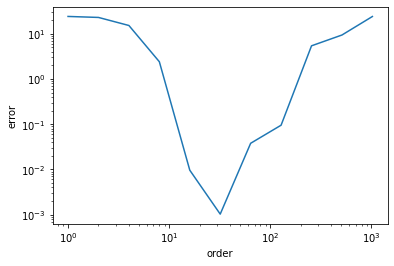

In [6]:
# your program here
import math 
error = []
inte_list=[]


tlist=list(map(lambda k:2**k,[0,1,2,3,4,5,6,7,8,9,10]))
num=0
for k in tlist:
    a = 0
    N = 65
    h = (k-a)/(N-1)
    
    inte=0
    for i in range(1,(N-1)//2+1):
        inte += h/3 * (f(a+(2*i-2)*h) + 4 * f(a+(2*i-1)*h) + f(a+(2*i)*h))
    inte_list.append(inte)
    error.append(np.abs(math.factorial(4) - inte))


plt.loglog(tlist,error)
plt.yscale("log")
plt.ylabel("error")
plt.xlabel("order")
#print(inte_list[5])

print("when L = 2 ^", error.index(min(error)),",overall error is minimal" )
print("The total error is :", min(error))